In [1]:
#Does the total volume of avocados sold differ between Indianapolis, 
#Orlando, and PhoenixTucson?

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [3]:
AvocadoVolume = pd.read_csv('C:/Users/olver/Desktop/avocados.csv')

In [4]:
AvocadoVolume.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
AvocadoVolume2 = AvocadoVolume[['Total Volume', 'region']]

In [6]:
AvocadoVolume2.head()

,Total Volume,region
0,64236.62,Albany
1,54876.98,Albany
2,118220.22,Albany
3,78992.15,Albany
4,51039.60,Albany


In [7]:
AvocadoVolume2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   region        18249 non-null  object 
dtypes: float64(1), object(1)
memory usage: 285.3+ KB


In [23]:
AvocadoVolume2.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [21]:
def recode (series): 
    if series == ["Indianapolis"]: 
        return "1"
    if series == ["Orlando"]: 
        return "2"
    if series == ["PhoenixTucson"]: 
        return "3"
    else:
        return "0"

AvocadoVolume2['regionR'] = AvocadoVolume2['region'].apply(recode)

C:\Users\olver\AppData\Local\Temp/ipykernel_18344/2443937858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AvocadoVolume2['regionR'] = AvocadoVolume2['region'].apply(recode)


In [9]:
AvocadoVolume2.head()

,Total Volume,region,regionR
0,64236.62,Albany,None
1,54876.98,Albany,None
2,118220.22,Albany,None
3,78992.15,Albany,None
4,51039.60,Albany,None


C:\Users\olver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

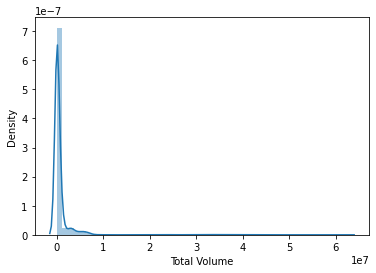

In [10]:
sns.distplot(AvocadoVolume2['Total Volume'])

In [11]:
AvocadoVolume2['TotalVolumeSQRT'] = np.sqrt(AvocadoVolume2['Total Volume'])

C:\Users\olver\AppData\Local\Temp/ipykernel_18344/356285895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AvocadoVolume2['TotalVolumeSQRT'] = np.sqrt(AvocadoVolume2['Total Volume'])


In [12]:
AvocadoVolume2.head()

,Total Volume,region,regionR,TotalVolumeSQRT
0,64236.62,Albany,None,253.449443
1,54876.98,Albany,None,234.258362
2,118220.22,Albany,None,343.831674
3,78992.15,Albany,None,281.055422
4,51039.60,Albany,None,225.919455


C:\Users\olver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeSQRT', ylabel='Density'>

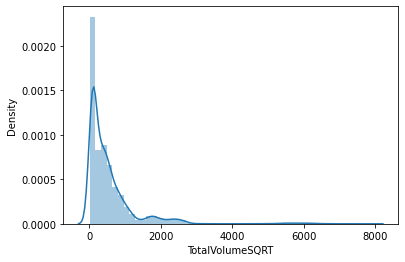

In [13]:
sns.distplot(AvocadoVolume2['TotalVolumeSQRT'])

In [14]:
AvocadoVolume2['TotalVolumeLOG'] = np.log(AvocadoVolume2['Total Volume'])

C:\Users\olver\AppData\Local\Temp/ipykernel_18344/1580385247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AvocadoVolume2['TotalVolumeLOG'] = np.log(AvocadoVolume2['Total Volume'])


In [15]:
AvocadoVolume2.head()

,Total Volume,region,regionR,TotalVolumeSQRT,TotalVolumeLOG
0,64236.62,Albany,None,253.449443,11.070329
1,54876.98,Albany,None,234.258362,10.912849
2,118220.22,Albany,None,343.831674,11.680304
3,78992.15,Albany,None,281.055422,11.277104
4,51039.60,Albany,None,225.919455,10.840357


C:\Users\olver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeLOG', ylabel='Density'>

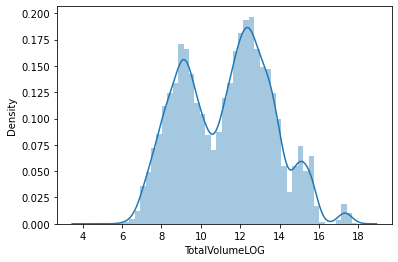

In [16]:
sns.distplot(AvocadoVolume2['TotalVolumeLOG'])

In [ ]:
scipy.stats.bartlett(AvocadoVolume2['TotalVolumeLOG'], AvocadoVolume2['region'])

In [25]:
AvocadoVolume.dropna(inplace=True)